In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7fac2f97766a343fde5b88c555fc7061


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | key largo
Processing Record 2 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 13 | yanan
City not found. Skipping...
Processing Record 4 of Set 13 | butaritari
Processing Record 5 of Set 13 | chuy
Processing Record 6 of Set 13 | hermanus
Processing Record 7 of Set 13 | mao
Processing Record 8 of Set 13 | mataura
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | avarua
Processing Record 11 of Set 13 | solnechnyy
Processing Record 12 of Set 13 | sao filipe
Processing Record 13 of Set 13 | arraial do cabo
Processing Record 14 of Set 13 | norman wells
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | asandh
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | vaini
Processing Record 19 of Set 13 | saleaula
City not found. Skipping...
Processing Record 20 of Set 13 | albany
Processing Record 21 of Set 13 | 

City not found. Skipping...
Processing Record 38 of Set 16 | hasaki
Processing Record 39 of Set 16 | provideniya
Processing Record 40 of Set 16 | karabuk
Processing Record 41 of Set 16 | nantucket
Processing Record 42 of Set 16 | torbay
Processing Record 43 of Set 16 | zhangye
Processing Record 44 of Set 16 | matagami
Processing Record 45 of Set 16 | borama
City not found. Skipping...
Processing Record 46 of Set 16 | modrica
Processing Record 47 of Set 16 | constitucion
Processing Record 48 of Set 16 | pitanga
Processing Record 49 of Set 16 | aklavik
Processing Record 50 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 17 | lebedyn
Processing Record 2 of Set 17 | tyazhinskiy
Processing Record 3 of Set 17 | parabel
Processing Record 4 of Set 17 | tecoanapa
Processing Record 5 of Set 17 | pangnirtung
Processing Record 6 of Set 17 | altamira
Processing Record 7 of Set 17 | samusu
City not found. Skipping...
Processing Record 8 of Set 17 | kruisfontein
Processing

Processing Record 20 of Set 20 | atherton
Processing Record 21 of Set 20 | kayes
Processing Record 22 of Set 20 | gatesville
Processing Record 23 of Set 20 | nome
Processing Record 24 of Set 20 | mokhsogollokh
Processing Record 25 of Set 20 | north myrtle beach
Processing Record 26 of Set 20 | hervey bay
Processing Record 27 of Set 20 | kamenka
Processing Record 28 of Set 20 | anadyr
Processing Record 29 of Set 20 | strzelin
Processing Record 30 of Set 20 | male
Processing Record 31 of Set 20 | warangal
Processing Record 32 of Set 20 | skjervoy
Processing Record 33 of Set 20 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 20 | egvekinot
Processing Record 35 of Set 20 | shimoda
Processing Record 36 of Set 20 | wote
Processing Record 37 of Set 20 | chilca
Processing Record 38 of Set 20 | lodja
Processing Record 39 of Set 20 | charters towers
Processing Record 40 of Set 20 | kalocsa
Processing Record 41 of Set 20 | vrbove
Processing Record 42 of Set 20 | porto novo
Pr

Processing Record 1 of Set 24 | dakoro
Processing Record 2 of Set 24 | aksarka
Processing Record 3 of Set 24 | sciacca
Processing Record 4 of Set 24 | punta alta
Processing Record 5 of Set 24 | marrakesh
Processing Record 6 of Set 24 | bhit shah
Processing Record 7 of Set 24 | maniitsoq
Processing Record 8 of Set 24 | the valley
Processing Record 9 of Set 24 | high level
Processing Record 10 of Set 24 | kon tum
Processing Record 11 of Set 24 | bichura
Processing Record 12 of Set 24 | huesca
Processing Record 13 of Set 24 | imbituba
Processing Record 14 of Set 24 | mumford
Processing Record 15 of Set 24 | clinton
Processing Record 16 of Set 24 | ryotsu
Processing Record 17 of Set 24 | dezful
Processing Record 18 of Set 24 | tura
Processing Record 19 of Set 24 | mrirt
City not found. Skipping...
Processing Record 20 of Set 24 | tomatlan
Processing Record 21 of Set 24 | cockburn town
Processing Record 22 of Set 24 | kalabo
Processing Record 23 of Set 24 | puerto carreno
Processing Record 

In [10]:
len(city_data)

548

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Key Largo,25.09,-80.45,80.01,1,73,4.00,US,2020-06-18 05:27:06
1,Butaritari,3.07,172.79,83.35,68,30,9.26,KI,2020-06-18 05:27:39
2,Chuy,-33.70,-53.46,67.30,79,100,15.57,UY,2020-06-18 05:27:39
3,Hermanus,-34.42,19.23,48.00,80,0,1.01,ZA,2020-06-18 05:27:40
4,Mao,39.89,4.27,68.00,88,40,6.93,ES,2020-06-18 05:27:40
5,Mataura,-46.19,168.86,39.00,83,1,3.00,NZ,2020-06-18 05:27:40
6,Bluff,-46.60,168.33,39.00,83,5,3.00,NZ,2020-06-18 05:27:40
7,Avarua,-21.21,-159.78,71.60,68,2,10.29,CK,2020-06-18 05:27:14
8,Solnechnyy,50.72,136.63,51.71,66,89,7.83,RU,2020-06-18 05:27:41
9,Sao Filipe,14.90,-24.50,76.80,73,3,9.17,CV,2020-06-18 05:27:41


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Key Largo,US,2020-06-18 05:27:06,25.09,-80.45,80.01,1,73,4.00
1,Butaritari,KI,2020-06-18 05:27:39,3.07,172.79,83.35,68,30,9.26
2,Chuy,UY,2020-06-18 05:27:39,-33.70,-53.46,67.30,79,100,15.57
3,Hermanus,ZA,2020-06-18 05:27:40,-34.42,19.23,48.00,80,0,1.01
4,Mao,ES,2020-06-18 05:27:40,39.89,4.27,68.00,88,40,6.93


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592625999.0456593

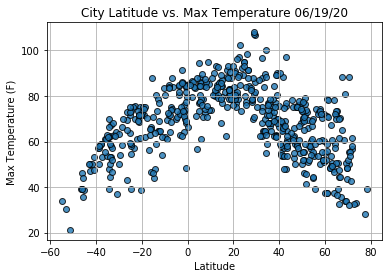

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

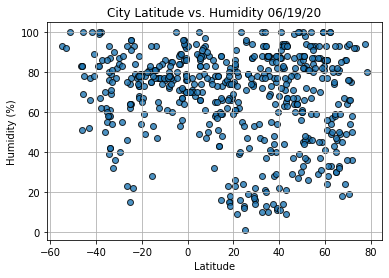

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

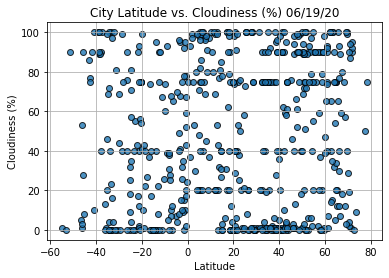

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

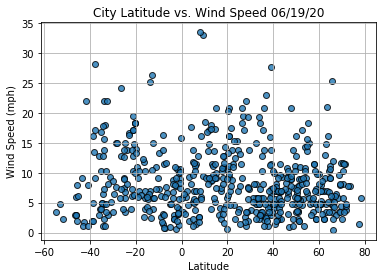

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()